# Comparison of different clustering algorithms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.similarity import SpectralClustering, HierarchicalClustering, AffinityPropagation
from clustertools.models.density import MeanShift, DBSCAN, plot_kde
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 20
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

In [3]:
#load fuzzy dataset and pre-process
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]

### Clustering on different data sets

Comment: Ich würde sagen, dass wir tabellen und grafiken (siehe unten) einfach vorbereiten und abspeichern für präsentation und paper, das währrend der präsentation auszurechnen dauert einfach zu lange. 

In [4]:
def format_subplots():
    plt.figure(figsize=(30,8))
    ax1 = plt.subplot2grid((2,5), (0, 0))
    ax2 = plt.subplot2grid((2,5), (0, 1))
    ax3 = plt.subplot2grid((2,5), (0, 2))
    ax4 = plt.subplot2grid((2,5), (0, 3))
    ax5 = plt.subplot2grid((2,5), (0, 4))
    ax6 = plt.subplot2grid((2,5), (1,0), colspan=6)
    ax = [ax1,ax2, ax3, ax4, ax5]
    row_labels=[ 'Computing time [s]', 'iter = # of iterations',  'k = # of clusters', 'Mean cluster-center distance']
    column_labels=['Spiral','Aggregation','Compound', 'Fuzzy', 'Pathbased']
    return ax, row_labels, column_labels

In [5]:
def format_table_data(dataset,estimatecluster, saveas = 'images/tabledataset.png'):
    ax, row_labels, column_labels = format_subplots()
    row_labels = ['       n = # of datapoints', 'd = dimension', 'estimated # of clusters']
    datasetresults = np.zeros((3,np.shape(dataset)[0]))
    for i in range(np.shape(dataset)[0]):
        data = dataset[i]
        datasetresults[ 0,i] = int(np.size(data,0))
        datasetresults[ 1,i] = int(np.size(data,1))
        ax[i].scatter(data[:,0],data[:,1],alpha=.3)
        ax[i].axis('off')
    datasetresults[2,:] = estimatecluster

    df = pd.DataFrame(datasetresults[:,:],row_labels , column_labels)
    ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu",annot_kws={"size": fontsizeset})
    plt.title('Data sets', fontsize=fontsizeset)
    plt.show()
    #plt.savefig(saveas)
    #binary, Blues, BuGn might be other good colormaps to use for table
    

In [6]:
spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')
dataset = [spiral, aggr, compound, fuzzy, pathbased]

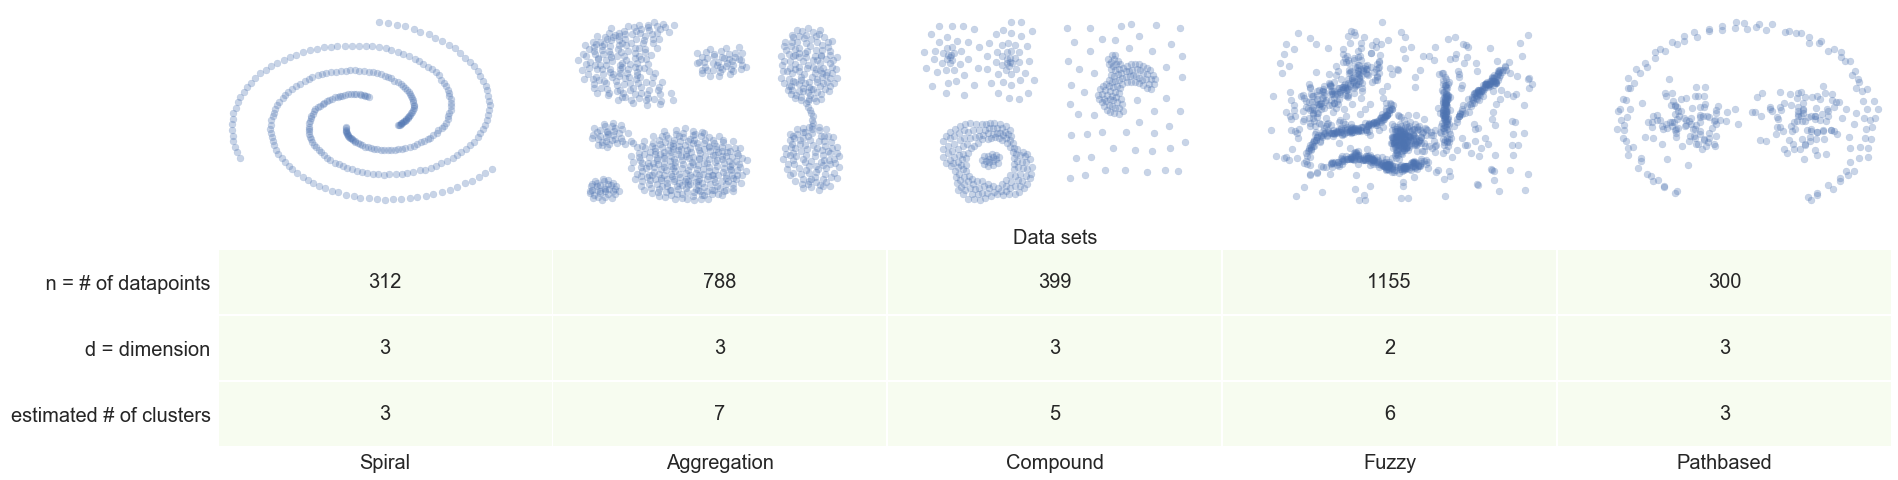

In [7]:
format_table_data(dataset, np.array([3,7,5,6,3]))

Now using the different algorithms on the data sets... still need to specify how (if so) the number of clusters was set and what the maximum number of iterations was. 
Note: some algorithms don't have an iteration count yet and some algorithms don't give cluster centers.

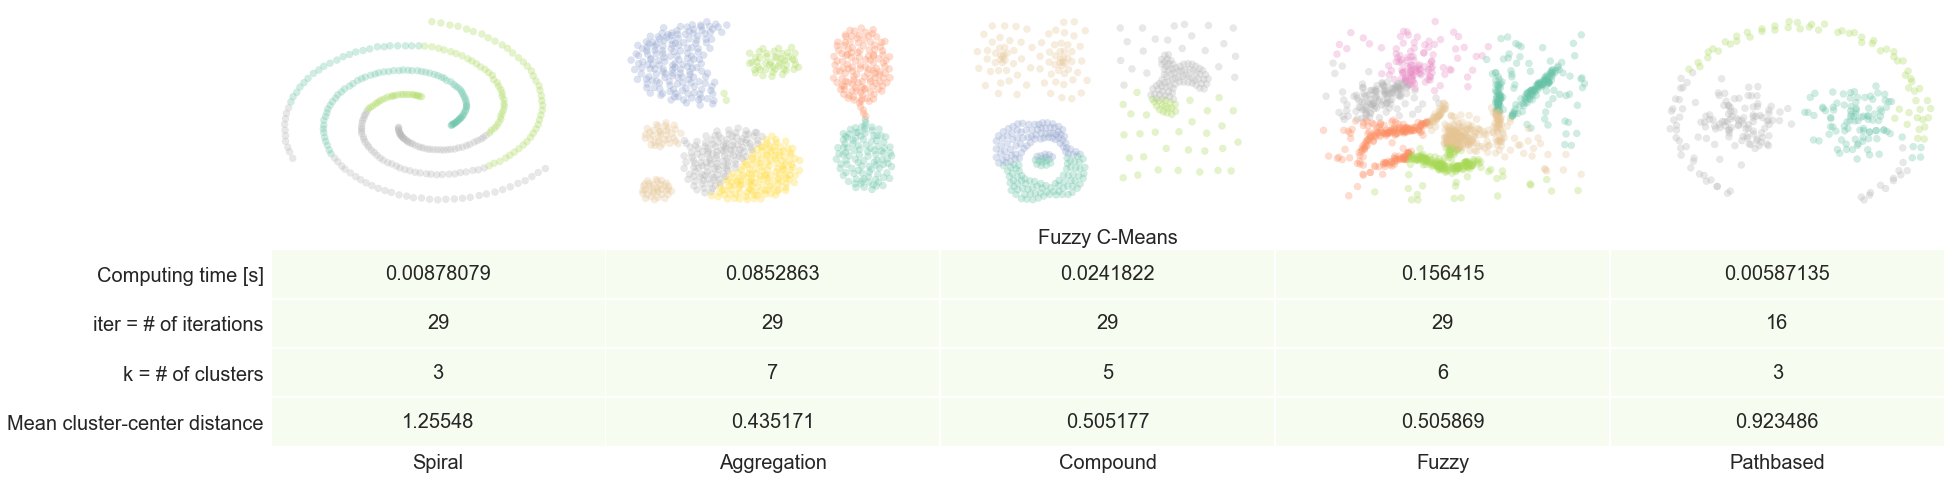

In [8]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    f = FuzzyCMeans(data,c, verbose = False )
    f.fit()
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = f._time
    results[ 1,i] = f._iter 
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('Fuzzy C-Means')
plt.show()
#plt.savefig('images/tablefuzzy.png')

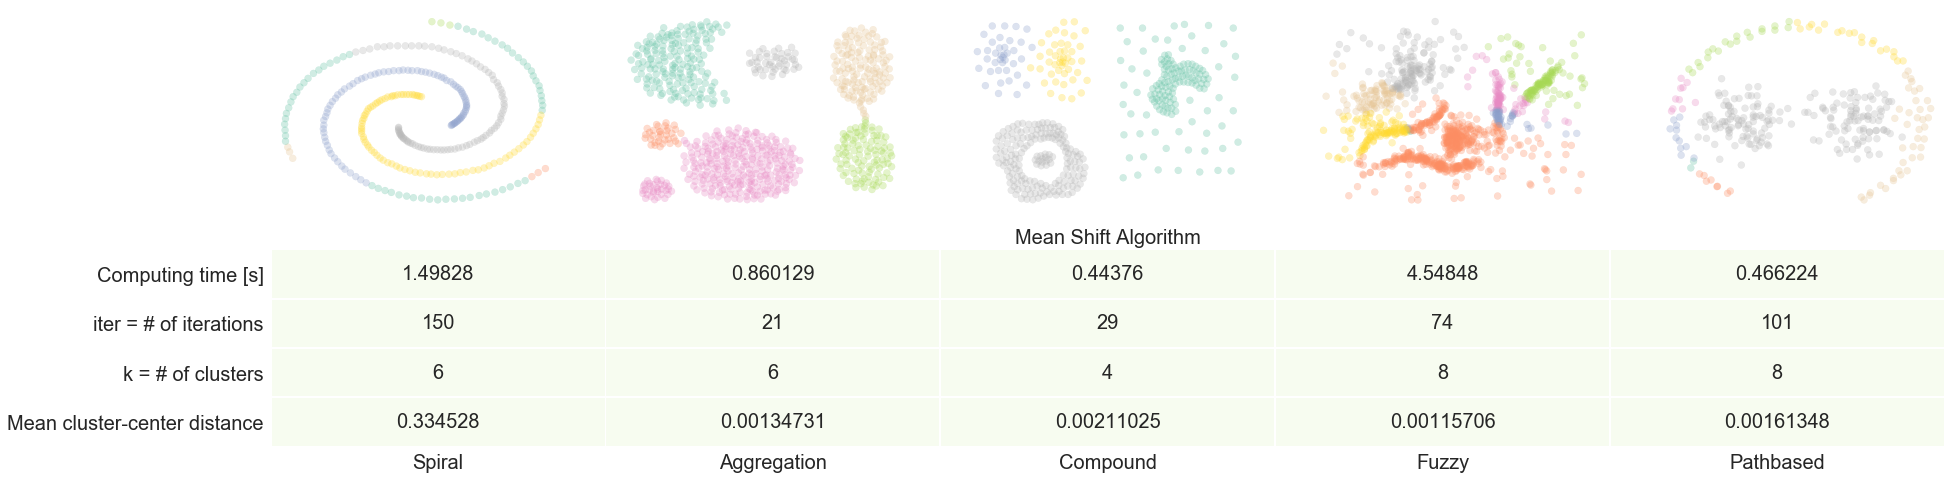

In [9]:
ax, row_labels, column_labels = format_subplots()
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    ms = MeanShift(data, verbose = False)
    ms.fit()
    labels = ms._cluster_labels
    results[3,i] = np.mean(ms._cluster_dist)
    results[0,i] = ms._time
    results[1,i] = ms._iter 
    results[2,i] = max(labels)
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')

df = pd.DataFrame(results[:,:], row_labels, column_labels)

ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")

plt.title('Mean Shift Algorithm')
plt.show()
#plt.savefig('images/tablemeanshift.png')

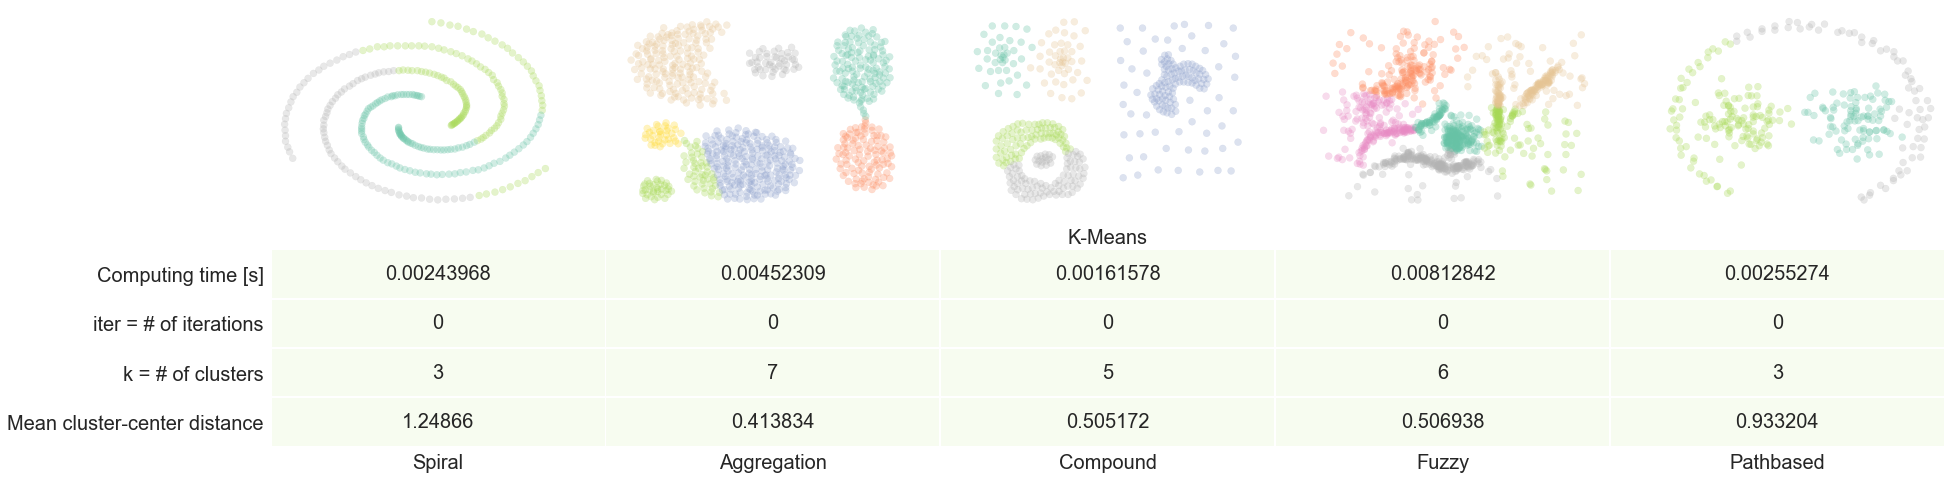

In [10]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    start_time = timer()
    f = KMeans(data,c, verbose = False )
    f.fit()
    time_taken = timer() - start_time
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = time_taken
    results[ 1,i] = 0 #f._iter, need to add iteration counter to kmeans code, just set to zero for now
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('K-Means')
plt.show()
#plt.savefig('images/tablekmeans.png')

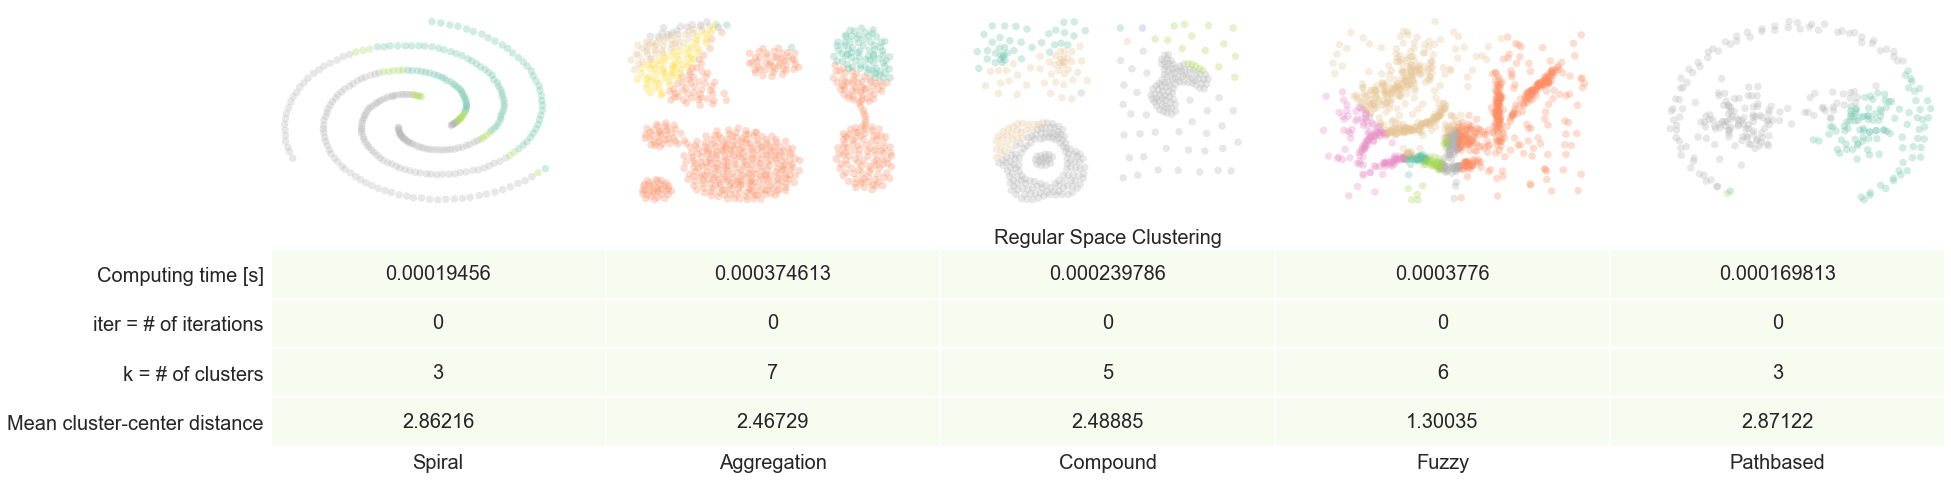

In [11]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    start_time = timer()
    f = Regspace(data,c,0.05, verbose=False)
    f.fit()
    time_taken = timer() - start_time
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = time_taken
    results[ 1,i] = 0 #f._iter, need to add iteration counter to kmeans code, just set to zero for now
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('Regular Space Clustering')
plt.show()
#plt.savefig('images/tableregspace.png')

## More compact tables
to do: 
- set the parameters for the different methods better
- maybe add more info than just computation time like nbr of iterations
- maybe split into several plots

In [12]:
spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')

In [13]:
dataset = [spiral, aggr, compound, fuzzy, pathbased]
clusternumber= [3,7,5,6,3]
nbdataex = 5 #nbr of data sets we are using the algorithms on
nbalgor = 10 #number of algorithms we are plotting plus one just for the data set

#titles of the algorithms
algorithmnames = ['Datasets', 'Fuzzy C-Means', 'Mean Shift', 'K-Means', 'Regular Space', 'Spectral Clustering', 'DBSCAN', 'K-Means++', 'Affinity Clustering','Hierarchical']
#set order of the algorithms, right now: alphabetical
algorithmorder = [0,3,7,5,8,9,2,6,1,4]

Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing squared distance matrix
Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing squared distance matrix
Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing squared distance matrix
Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing squared distance matrix
Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem
Constructing squared distance matrix


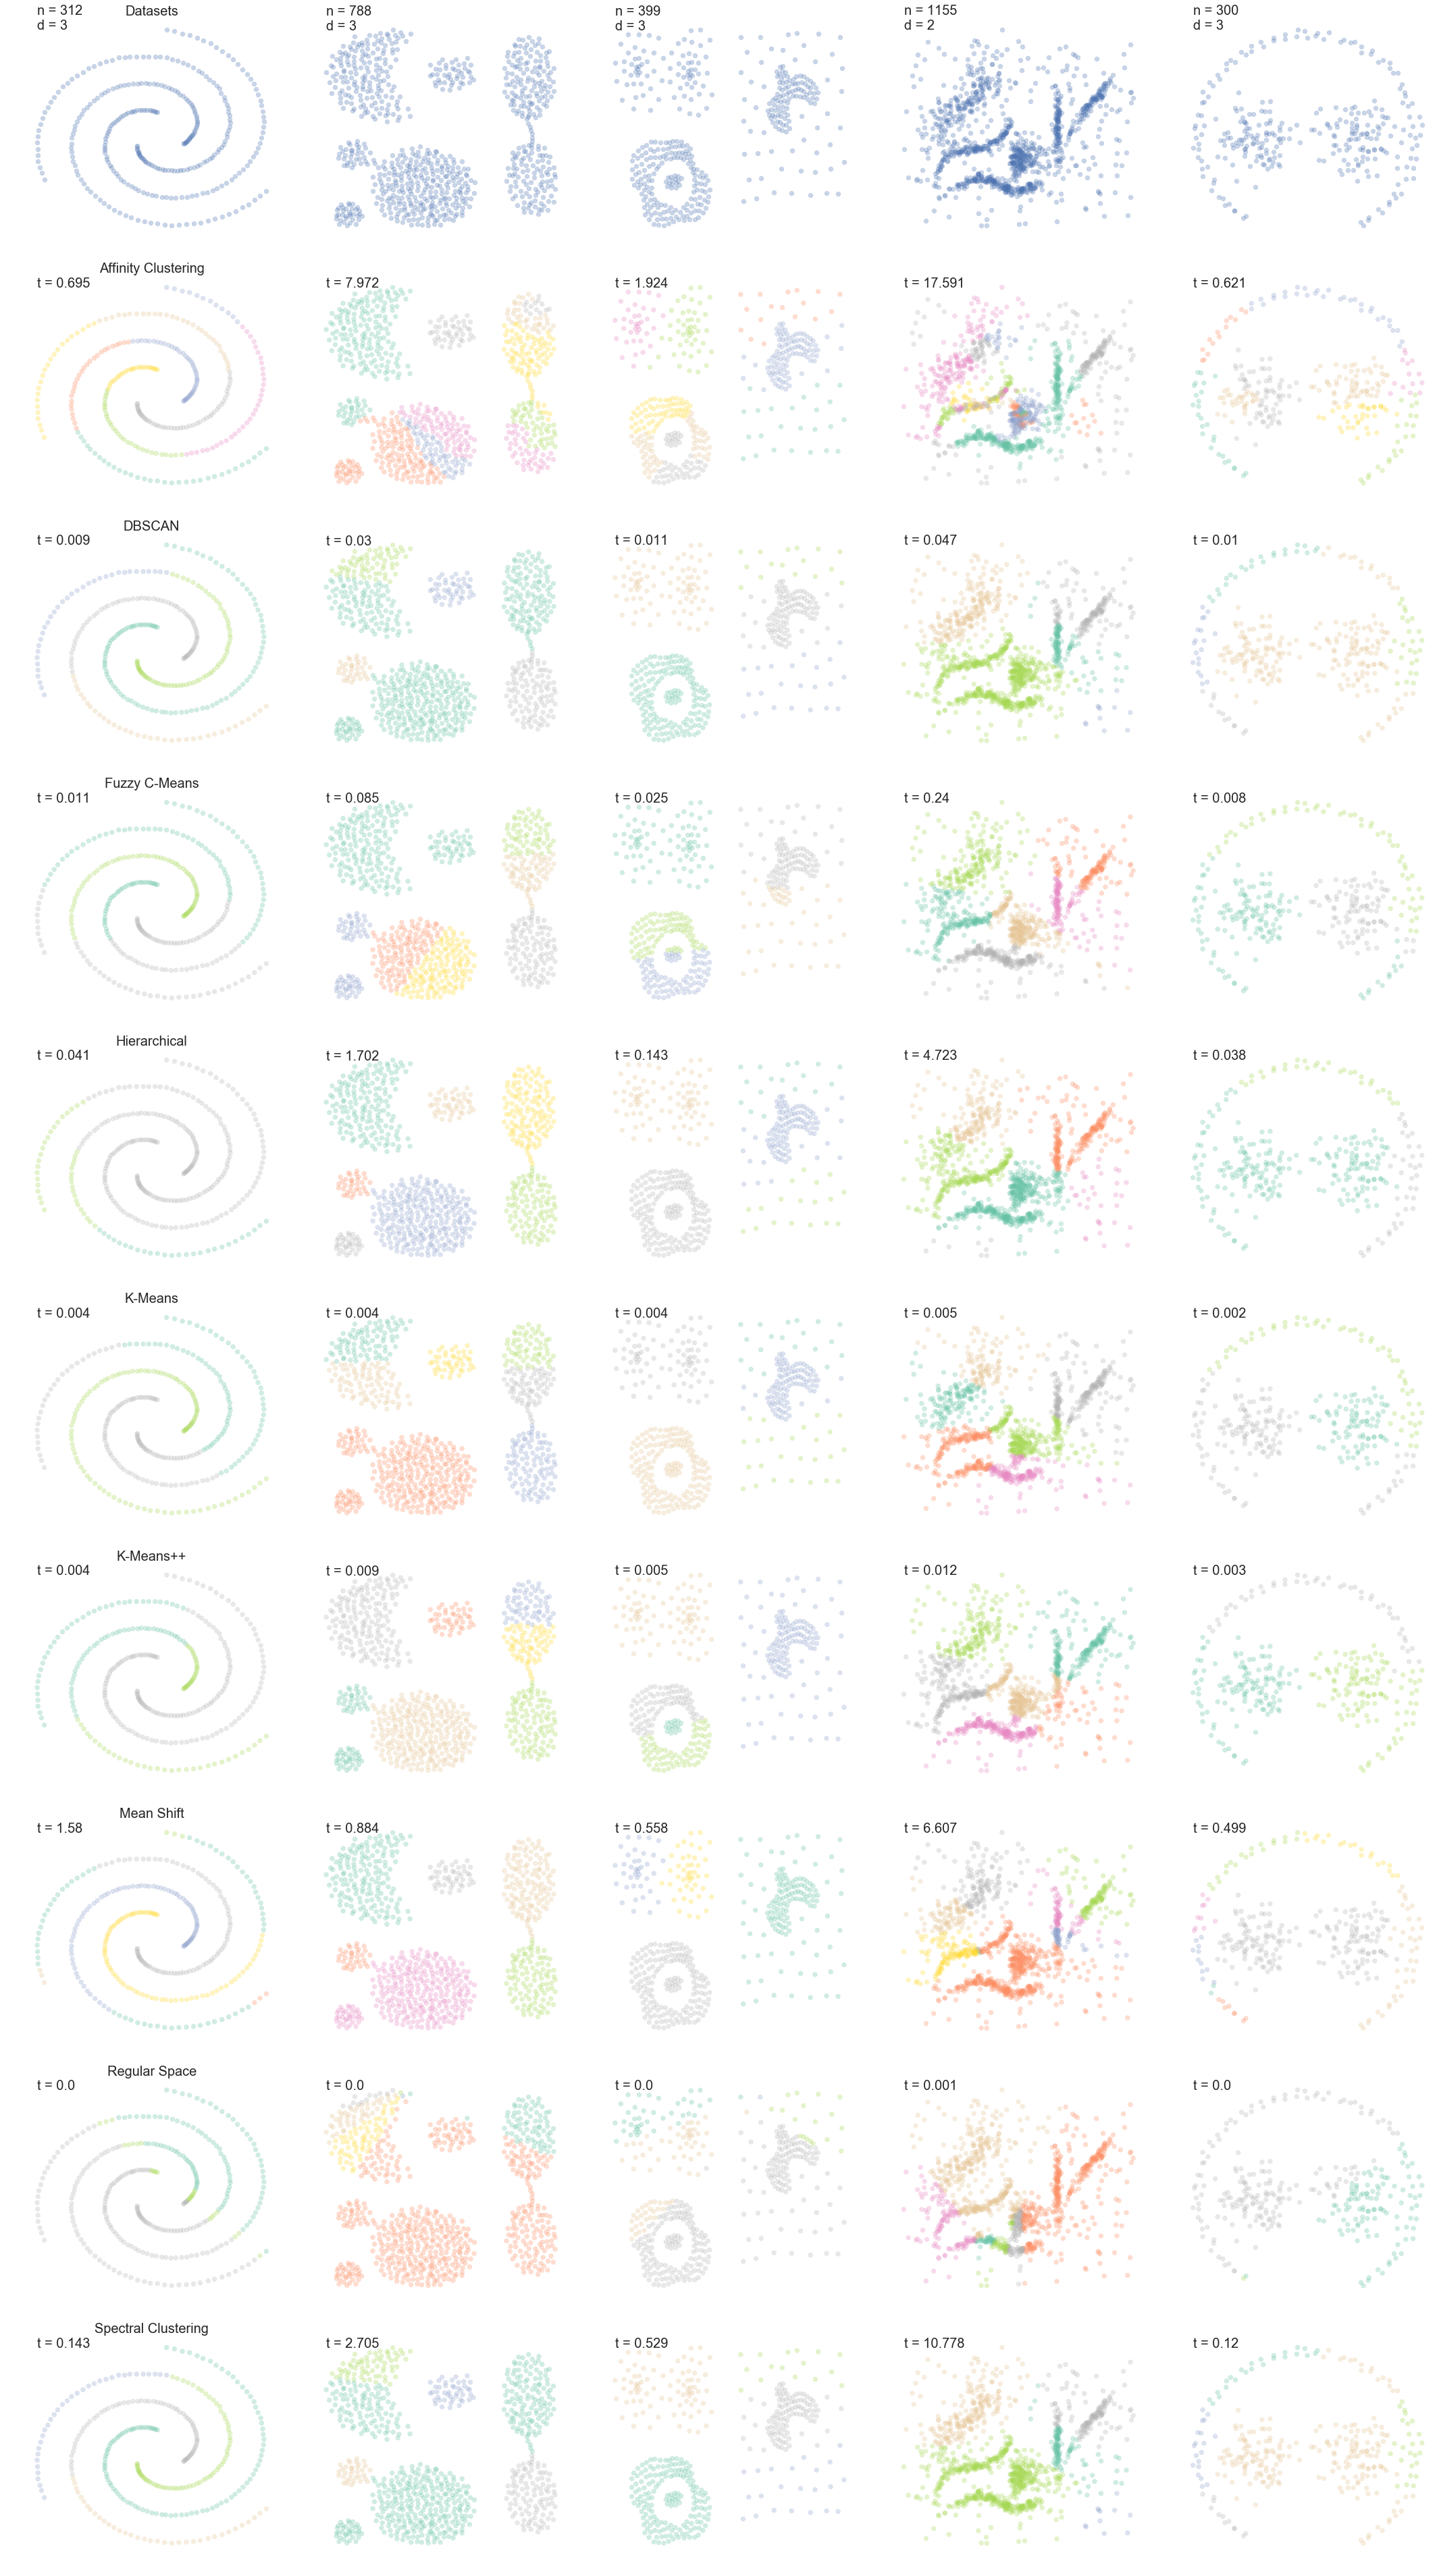

In [14]:
f,ax=plt.subplots(nbalgor, nbdataex, figsize=(6*nbdataex,6*nbalgor))

#for loop over all datasets, each time plotting every algorithms
for i in range(nbdataex):
    data = dataset[i]
    #data sets
    n = int(np.size(data,0))
    d = int(np.size(data,1))
    ax[algorithmorder[0],i].scatter(data[:,0],data[:,1],alpha=.3)
    ax[algorithmorder[0],i].annotate('n = '+str(n)+'\nd = '+str(d),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[0],i].axis('off')

    #fuzzy c mean
    start_time = timer()  
    fc = FuzzyCMeans(data,clusternumber[i], verbose = False )
    fc.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = fc._cluster_labels
    ax[algorithmorder[1],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[1],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[1],i].axis('off')
    
    #mean shift
    start_time = timer()  
    ms = MeanShift(data, verbose = False)
    ms.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = ms._cluster_labels
    ax[algorithmorder[2],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[2],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[2],i].axis('off')
      
    #kmeans
    start_time = timer()  
    k = KMeans(data,clusternumber[i], verbose = False )
    k.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = k._cluster_labels
    ax[algorithmorder[3],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[3],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[3],i].axis('off')    
   
    #reg space
    start_time = timer() 
    r = Regspace(data,clusternumber[i],0.05, verbose=False)
    r.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = r._cluster_labels
    ax[algorithmorder[4],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[4],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[4],i].axis('off') 
    
    #spectral clustering
    start_time = timer() 
    s = SpectralClustering(data,5,similarity_measure='gaussian',bandwidth=.3,laplacian='normalized', verbose=False)
    s.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = s.cluster_labels
    ax[algorithmorder[5],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[5],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[5],i].axis('off') 
    
    #dbscan
    start_time = timer() 
    d = DBSCAN(data,eps=0.03, minPts=10, verbose=False)
    d.fit()
    time_taken = np.round(timer() - start_time,3)
    #labels = d._cluster_labels #need to change that outliers are classified as noise
    ax[algorithmorder[6],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[6],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[6],i].axis('off') 
    
    #kmeans++
    start_time = timer() 
    k = KMeans(data,clusternumber[i], method = 'kmeans++', verbose = False )
    k.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = k._cluster_labels 
    ax[algorithmorder[7],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[7],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[7],i].axis('off') 
    
    #affinity
    start_time = timer() 
    a = AffinityPropagation(data, verbose=False)
    a.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = a._cluster_labels 
    ax[algorithmorder[8],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[8],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[8],i].axis('off') 
    
    #hierarchical
    start_time = timer() 
    h = HierarchicalClustering(data,k=clusternumber[i], verbose=False)
    h.fit()
    time_taken = np.round(timer() - start_time,3)
    labels = h.cluster_labels 
    ax[algorithmorder[9],i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[algorithmorder[9],i].annotate('t = '+str(time_taken),(min(data[:,0]),max(data[:,1])), fontsize=fontsizeset)
    ax[algorithmorder[9],i].axis('off') 
           
#plt.title('Data sets', fontsize=fontsizeset)
for j in range(nbalgor):
    ax[algorithmorder[j],0].set_title(algorithmnames[j], fontsize=fontsizeset)

#tight layout of the plots    
f.tight_layout()
f.subplots_adjust(top=0.88)
    
#plt.show()
plt.savefig('images/table.png')
